In [26]:
import requests
import urllib.request  as urllib2
import requests as rq
import json

# Format a request URI for the Genius API
search_term = 'Andy Shauf'
_URL_API = "https://api.genius.com/"
_URL_SEARCH = "search?q="
querystring = _URL_API + _URL_SEARCH + urllib2.quote(search_term)
request = urllib2.Request(querystring)
request.add_header("Authorization", "Bearer " + "B5_3VCVYKKHFZTdmG98gUrI4tTaTTWfqxradM40jT6Va3V4KBNy21YLZ2rSDL-JQ")
request.add_header("User-Agent", "")

response = urllib2.urlopen(request, timeout=3)
json_obj = rq.get(response).json()




MissingSchema: Invalid URL '<http.client.HTTPResponse object at 0x1a2805d898>': No schema supplied. Perhaps you meant http://<http.client.HTTPResponse object at 0x1a2805d898>?

In [32]:
import requests
import json 
base_url = "http://api.genius.com/artists/72/songs"
headers = {'Authorization': "B5_3VCVYKKHFZTdmG98gUrI4tTaTTWfqxradM40jT6Va3V4KBNy21YLZ2rSDL-JQ"}
search_url = base_url
response = requests.get(search_url, data=data, headers=headers)
json = response.json()
print(json)

{'meta': {'status': 401, 'message': 'This call requires an access_token. Please see: https://genius.com/developers'}}


In [34]:

import requests, json
from time import sleep

# constant values.
BASE_URL = "https://api.genius.com"
CLIENT_ACCESS_TOKEN = "B5_3VCVYKKHFZTdmG98gUrI4tTaTTWfqxradM40jT6Va3V4KBNy21YLZ2rSDL-JQ"
ARTIST_NAME = "Kanye West"

# send request and get response in json format.
def _get(path, params=None, headers=None):

    # generate request URL
    requrl = '/'.join([BASE_URL, path])
    token = "Bearer {}".format(CLIENT_ACCESS_TOKEN)
    if headers:
        headers['Authorization'] = token
    else:
        headers = {"Authorization": token}

    response = requests.get(url=requrl, params=params, headers=headers)
    response.raise_for_status()

    return response.json()

def get_artist_songs(artist_id):
    # initialize variables & a list.
    current_page = 1
    next_page = True
    songs = []

    # main loop
    while next_page:

        path = "artists/{}/songs/".format(artist_id)
        params = {'page': current_page}
        data = _get(path=path, params=params)

        page_songs = data['response']['songs']

        if page_songs:
            # add all the songs of current page,
            # and increment current_page value for next loop.
            songs += page_songs
            current_page += 1
        else:
            # if page_songs is empty, quit.
            next_page = False

    # get all the song ids, excluding not-primary-artist songs.
    songs = [song["id"] for song in songs
             if song["primary_artist"]["id"] == artist_id]

    return songs

def get_song_information(song_ids):
    # initialize a dictionary.
    song_list = {}

    # main loop
    for i, song_id in enumerate(song_ids):
        print("id:" + str(song_id) + " start. ->")

        path = "songs/{}".format(song_id)
        data = _get(path=path)["response"]["song"]

        song_list.update({
        i: {
            "title": data["title"],
            "album": data["album"]["name"] if data["album"] else "<single>",
            "release_date": data["release_date"] if data["release_date"] else "unidentified",
            "featured_artists":
                [feat["name"] if data["featured_artists"] else "" for feat in data["featured_artists"]],
            "producer_artists":
                [feat["name"] if data["producer_artists"] else "" for feat in data["producer_artists"]],
            "writer_artists":
                [feat["name"] if data["writer_artists"] else "" for feat in data["writer_artists"]],
            "genius_track_id": song_id,
            "genius_album_id": data["album"]["id"] if data["album"] else "none"}
        })

        print("-> id:" + str(song_id) + " is finished. \n")
    return song_list

# # # 

print("searching " + ARTIST_NAME + "'s artist id. \n")

# find artist id from given data.
find_id = _get("search", {'q': ARTIST_NAME})
for hit in find_id["response"]["hits"]:
   if hit["result"]["primary_artist"]["name"] == ARTIST_NAME:
       artist_id = hit["result"]["primary_artist"]["id"]
       break

print("-> " + ARTIST_NAME + "'s id is " + str(artist_id) + "\n")

print("getting song ids. \n")

# get all song ids and make a list.
song_ids = get_artist_songs(artist_id)

with open("./" + ARTIST_NAME + " Genius Song IDs.text", "w") as f:
    for k in song_ids:
        f.write(str(k))

print(song_ids)
print("\n-> got all the song ids. take a break for a while \n")

sleep(30)

print("getting meta data of each song. \n")

# finally, make a full list of songs with meta data.
full_list_of_songs = get_song_information(song_ids)

print("-> Finished! Dump the data into json data. \n")

with open("./" + ARTIST_NAME + " Songs.json", "w") as f:
    json.dump(full_list_of_songs, g)

print("-> Mission complete! Check it out!")

searching Kanye West's artist id. 

-> Kanye West's id is 72

getting song ids. 

[4363778, 3187721, 480181, 2417857, 235515, 235522, 214545, 224216, 229778, 333592, 717578, 713373, 2846871, 2421955, 716974, 662770, 2439314, 252968, 3957716, 249802, 2448, 4021975, 482233, 3164090, 745685, 86, 25725, 2878379, 3720959, 1781, 1298330, 5437, 2000, 414571, 182396, 25787, 1174110, 6067, 2322, 50103, 2925061, 721443, 152268, 2878046, 2424888, 3056, 3404, 3796275, 38, 69957, 3005522, 716912, 25758, 247942, 249, 504846, 266749, 2662, 441182, 152933, 2833641, 2410689, 1944, 167180, 2450737, 4953, 241421, 25746, 25751, 373064, 158615, 3666033, 3662888, 3397, 3137, 848, 2848, 560247, 1115, 2327379, 2351, 1964, 688, 2488417, 378515, 1410, 2658, 25772, 87225, 700176, 721589, 70202, 3405, 2449130, 2914657, 3254, 4326785, 3231505, 1660, 2433053, 1207, 1859, 4326762, 2903412, 515, 3407, 62913, 72024, 1611, 3677948, 142887, 3612, 1829420, 4326813, 994, 1791220, 25749, 3231503, 471, 1141961, 25747, 27118

-> id:378515 is finished. 

id:1410 start. ->
-> id:1410 is finished. 

id:2658 start. ->
-> id:2658 is finished. 

id:25772 start. ->
-> id:25772 is finished. 

id:87225 start. ->
-> id:87225 is finished. 

id:700176 start. ->
-> id:700176 is finished. 

id:721589 start. ->
-> id:721589 is finished. 

id:70202 start. ->
-> id:70202 is finished. 

id:3405 start. ->
-> id:3405 is finished. 

id:2449130 start. ->
-> id:2449130 is finished. 

id:2914657 start. ->
-> id:2914657 is finished. 

id:3254 start. ->
-> id:3254 is finished. 

id:4326785 start. ->
-> id:4326785 is finished. 

id:3231505 start. ->
-> id:3231505 is finished. 

id:1660 start. ->
-> id:1660 is finished. 

id:2433053 start. ->
-> id:2433053 is finished. 

id:1207 start. ->
-> id:1207 is finished. 

id:1859 start. ->
-> id:1859 is finished. 

id:4326762 start. ->
-> id:4326762 is finished. 

id:2903412 start. ->
-> id:2903412 is finished. 

id:515 start. ->
-> id:515 is finished. 

id:3407 start. ->
-> id:3407 is finish

-> id:3680634 is finished. 

id:146092 start. ->
-> id:146092 is finished. 

id:154543 start. ->
-> id:154543 is finished. 

id:2853290 start. ->
-> id:2853290 is finished. 

id:3553 start. ->
-> id:3553 is finished. 

id:3829305 start. ->
-> id:3829305 is finished. 

id:123199 start. ->
-> id:123199 is finished. 

id:3735288 start. ->
-> id:3735288 is finished. 

id:1811 start. ->
-> id:1811 is finished. 

id:1323 start. ->
-> id:1323 is finished. 

id:1656 start. ->
-> id:1656 is finished. 

id:3989673 start. ->
-> id:3989673 is finished. 

id:2228 start. ->
-> id:2228 is finished. 

id:414601 start. ->
-> id:414601 is finished. 

id:2421965 start. ->
-> id:2421965 is finished. 

id:25785 start. ->
-> id:25785 is finished. 

id:50186 start. ->
-> id:50186 is finished. 

id:70324 start. ->
-> id:70324 is finished. 

id:148436 start. ->
-> id:148436 is finished. 

id:2250357 start. ->
-> id:2250357 is finished. 

id:745665 start. ->
-> id:745665 is finished. 

id:1149 start. ->
-> id:1

-> id:1055169 is finished. 

id:2424250 start. ->
-> id:2424250 is finished. 

id:2415045 start. ->
-> id:2415045 is finished. 

id:714782 start. ->
-> id:714782 is finished. 

id:3688680 start. ->
-> id:3688680 is finished. 

id:2842147 start. ->
-> id:2842147 is finished. 

id:2425227 start. ->
-> id:2425227 is finished. 

id:87430 start. ->
-> id:87430 is finished. 

id:1320 start. ->
-> id:1320 is finished. 

id:863117 start. ->
-> id:863117 is finished. 

id:25792 start. ->
-> id:25792 is finished. 

id:84380 start. ->
-> id:84380 is finished. 

id:141213 start. ->
-> id:141213 is finished. 

id:4128285 start. ->
-> id:4128285 is finished. 

id:25796 start. ->
-> id:25796 is finished. 

id:238 start. ->
-> id:238 is finished. 

id:877890 start. ->
-> id:877890 is finished. 

id:1796450 start. ->
-> id:1796450 is finished. 

id:4326849 start. ->
-> id:4326849 is finished. 

id:2109790 start. ->
-> id:2109790 is finished. 

id:25791 start. ->
-> id:25791 is finished. 

id:2934922 st

NameError: name 'g' is not defined

In [5]:
kanyes_songs = ["Intro", "We-Dont-Care", "Graduation-Day", "All-Falls-Down" ,"Ill-Fly-Away", "Spaceship" ,"Jesus-Walks", "Never-Let-Me-Down", "Get-Em-High" , "Workout-Plan", "The-New-Workout-Plan", 
 "Slow-Jamz", "Breathe-in-Breathe-Out" , "School-Spirit","Two-Words", "Through-the-Wire", "Family-Business", "Last-Call", "Wake-Up-Mr-West", "Heard-Em-Say", "Touch-the-Sky" ,"Gold-Digger", "Drive-Slow", "My-Way-Home"
, "Crack-Music" , "Roses", "Bring-Me-Down", "Addiction", "We-Major", "Hey-Mama", "Celebration",
"Gone" , "Diamonds-from-Sierra-Leone", "Late", "Good-Morning", "Champion", "All-Day" ,"Stronger", "I-Wonder", "Good-Life", "Cant-Tell-Me-Nothing",
"Barry-Bonds" , "Drunk-and-Hot-Girls", "Flashing-Lights" ,"Everything-I-Am", "The-Glory", "Homecoming","Big-Brother", "Say-You-Will", "Welcome-to-Heartbreak", "Heartless", "Amazing" , "Love-Lockdown", "Paranoid" , "RoboCop", "Street-Lights", "Bad-News",
"See-You-in-My-Nightmares" ,"Coldest-Winter", "Pinocchio-Story", "Dark-Fantasy", "Gorgeous", "Power", "All-of-the-Lights", "Monster", 
"So-Appalled", "Devil-in-a-New-Dress", "Runaway" , "Hell-of-a-Life", "Blame-Game" , "Lost-in-the-World" , "Who-Will-Survive-in-America", "On-Sight", "Black-Skinhead", "I-Am-a-God", "New-Slaves", "Hold-My-Liquor", "Im-In-It", "Blood-on-the-Leaves", "Guilt-Trip", "Send-It-Up", "Bound-2", "Ultralight-Beam", "Father-Stretch-My-Hands-Pt-1", "Pt-2", "Famous", "Feedback", "Low-Lights", 
                "Highlights", "Freestyle-4", "I-Love-Kanye", "Waves", "FML", "Real-Friends", "Wolves", "Franks-Track", "Siiiiiiiiilver-Surffffeeeeer-Intermission", "30-Hours", "No-More-Parties-in-LA", "Facts", "Fade", "Saint-Pablo", "Yikes", "All-Mine", "Wouldnt-Leave" , "No-Mistakes", "Ghost-Town", "Violent-Crimes"]

In [6]:
from bs4 import BeautifulSoup
import re
all_lyrics = []
for i in kanyes_songs:
    print(i)
    URL = "https://genius.com/Kanye-West-" + i + "-lyrics"
    page = requests.get(URL)
    html = BeautifulSoup(page.text, "html.parser") # Extract the page's HTML as a string
    # Scrape the song lyrics from the HTML
    lyrics = html.find("div", class_="lyrics").get_text()
    all_lyrics.append(lyrics)

Intro
We-Dont-Care
Graduation-Day
All-Falls-Down
Ill-Fly-Away
Spaceship
Jesus-Walks
Never-Let-Me-Down
Get-Em-High
Workout-Plan
The-New-Workout-Plan
Slow-Jamz
Breathe-in-Breathe-Out
School-Spirit
Two-Words
Through-the-Wire
Family-Business
Last-Call
Wake-Up-Mr-West
Heard-Em-Say
Touch-the-Sky
Gold-Digger
Drive-Slow
My-Way-Home
Crack-Music
Roses
Bring-Me-Down
Addiction
We-Major
Hey-Mama
Celebration
Gone
Diamonds-from-Sierra-Leone
Late
Good-Morning
Champion
All-Day
Stronger
I-Wonder
Good-Life
Cant-Tell-Me-Nothing
Barry-Bonds
Drunk-and-Hot-Girls
Flashing-Lights
Everything-I-Am
The-Glory
Homecoming
Big-Brother
Say-You-Will
Welcome-to-Heartbreak
Heartless
Amazing
Love-Lockdown
Paranoid
RoboCop
Street-Lights
Bad-News
See-You-in-My-Nightmares
Coldest-Winter
Pinocchio-Story
Dark-Fantasy
Gorgeous
Power
All-of-the-Lights
Monster
So-Appalled
Devil-in-a-New-Dress
Runaway
Hell-of-a-Life
Blame-Game
Lost-in-the-World
Who-Will-Survive-in-America
On-Sight
Black-Skinhead
I-Am-a-God
New-Slaves
Hold-My-Liquo

In [ ]:
#sentimental analysis


In [7]:
import re
import nltk

# Get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words("english")

def get_clean_words(file):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Load her markup
    markup = file

    # Remove table and external links
    markup_text = re.sub(r'\{\{[\s\S]*?\}\}', '', markup)

    # Remove category links
    markup_text = re.sub(r'\[\[Category.+\]\]', '', markup_text)

    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in re.findall('\w+', markup_text) if w.lower() not in stopwords]

    # Remove numbers
    words = [w for w in words if not _isnum(w)]

    return words



In [8]:
lyrics_split= []
for k in all_lyrics:
    lyrics_split.append(get_clean_words(k))
stopwords =  ["Produced", "by", "Kanye", "West", "[Chorus]", "[Chorus:", "+", "West]"]
for i in lyrics_split:
    for word in i:
        if(word in stopwords):
            i.remove(word)

In [9]:
from afinn import Afinn
afinn = Afinn()
afinns = []
for p in lyrics_split:
    sentence = ""
    for word in p:
        sentence = sentence +" "+ word
    score = afinn.score(sentence)
    score = score /(len(p))
    afinns.append(score)
print(afinns)


[0.18181818181818182, 0.014084507042253521, -0.12631578947368421, 0.03825136612021858, 0.3076923076923077, -0.03258145363408521, -0.11418685121107267, 0.02022058823529412, -0.059813084112149535, -0.15178571428571427, -0.01556420233463035, 0.06822262118491922, -0.035443037974683546, 0.03333333333333333, -0.14084507042253522, -0.06684491978609626, 0.11658031088082901, -0.014534883720930232, -0.03896103896103896, 0.02531645569620253, -0.02891566265060241, -0.05555555555555555, 0.03571428571428571, -0.09016393442622951, -0.013363028953229399, 0.03389830508474576, -0.09090909090909091, 0.06995884773662552, 0.0034542314335060447, 0.14606741573033707, -0.11688311688311688, 0.0055658627087198514, -0.006993006993006993, -0.04954954954954955, 0.16489361702127658, 0.15677966101694915, -0.09492273730684327, 0.11627906976744186, 0.013513513513513514, 0.14204545454545456, -0.026392961876832845, -0.09210526315789473, -0.417910447761194, 0.014018691588785047, -0.14728682170542637, 0.03021978021978022,

In [10]:
y = []
for i in range(0,108):
    y.append(i)
import matplotlib.pyplot as plt
print(len(afinns))
print(len(y))

plt.scatter( y, afinns)

108
108


In [11]:
afinn_new = afinns
afinn_new.remove(1.252808988764045)

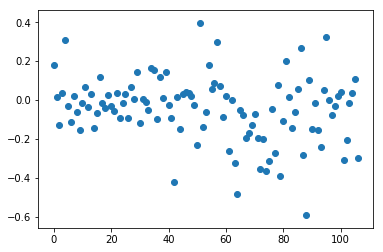

In [12]:
y = []
for i in range(0,107):
    y.append(i)
import matplotlib.pyplot as plt


plt.scatter( y, afinn_new)

In [13]:
def kanye_sent():
    #print("The null hypotheis: no difference between old and new Kanye")
    #print("Alternative hypothesis: New Kanye has statistically different afinn scores than old Kanye")
    #print("Performing the following test with an alpha = 0.05")
    #last six = last 50  
    last = []
    last_all =[]
    for i in range(57, 107):
        last_all.append(afinn_new[i])
    #first 18 = first 50 
    first = []
    first_all = []
    for k in range(0,49):
        first_all.append(afinn_new[k])
    import random
    for i in range(0,30):
        first.append(random.choice(first_all))
        last.append(random.choice(last_all))
    import statistics 
    import math
    import scipy.stats as st
    std_l = statistics.stdev(last)
    std_f = statistics.stdev(first)
    mean_l = (sum(last)/len(last))
    mean_f = (sum(first)/len(first))
    try:
        z_score = (mean_l-mean_f)/math.sqrt(((std_l*std_l)/len(last))-((std_f*std_f)/len(first)))
    except:
        z_score = -3.9
    #print("The Z Score is: ", z_score)
    prob = st.norm.cdf(z_score)
    if(prob < 0.05):
        #print("This correlates to "+ str(prob) + " probalility that the two means sampled are not significantly different, since this is lower than 0.05 we can reject the null hypothesis in favor of the alternative hypothesis")
        return(0)
    else:
        #print("This correlates to "+ str(prob) + " probalility that the two means sampled are not significantly different, since this is higher than 0.05 we fail to reject null hypothesis")
        return(1)


In [14]:
fail = 0
for i in range(1,10000):
    fail = fail + kanye_sent()
print(fail/10000)
    

0.1117


In [17]:
import spotipy
import sys

spotify = spotipy.Spotify()

if len(sys.argv) > 1:
    name = ' '.join(sys.argv[1:])
else:
    name = 'Radiohead'

results = spotify.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print (artist['name'], artist['track'])

SpotifyException: http status: 401, code:-1 - https://api.spotify.com/v1/search?q=artist%3A-f+%2FUsers%2Fclairemarie%2FLibrary%2FJupyter%2Fruntime%2Fkernel-10df05f5-3571-489f-ae2c-57462c731ccf.json&limit=10&offset=0&type=artist:
 No token provided